***
# Key takeaways

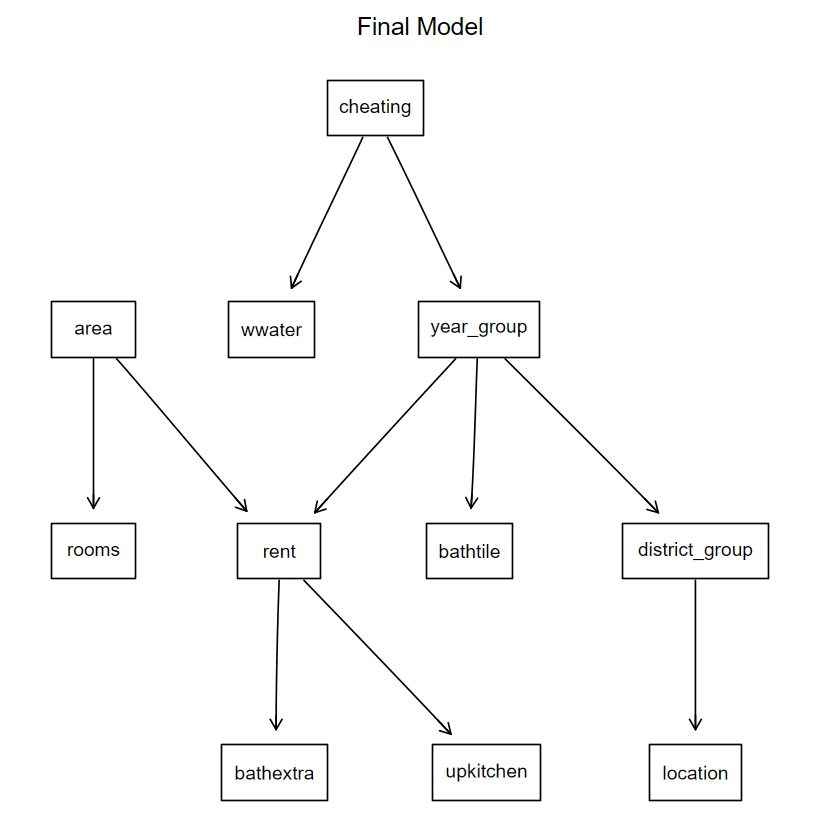

- `rent` is directly related to the property's area (`area`), year of construction (  `year_group`), and the presence of high-quality bathroom and upscale kitchen equipment (  `bathextra` and `upkitchen`). The remaining factors are indirectly related to the `rent` through these direct factors. 

- Once the direct factors are known, the indirect ones become conditionally independent of `rent`, i.e., they no longer affect its probability

- Most houses are equipped with basic amenities, while high-end amenities are very rare (similar to what was observed in the EDA).

- A house equipped with high quality equipment in the bathroom and upscale equipment in the kitchen is likely to fall into the following rent segments:
    - `rent` $\in$ [€77.31, €406.13] $\rightarrow$ Probability = 0.520%
    - `rent` $\in$ (€406.132, €687.072] $\rightarrow$ Probability = 14.514%
    - `rent` $\in$ (€687.072, €1789.55] $\rightarrow$ Probability = 84.966%


The findings above are derived from the codes below.

# Import the data

In [1]:
data = read.csv("munichrent03_python.csv")
head(data,5)

,rent,area,rooms,yearc,bathextra,bathtile,cheating,district,location,upkitchen,wwater
,<dbl>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,741.39,68,2,1918,no,yes,yes,Lud-Isar,good,no,yes
2,715.82,65,2,1995,no,yes,yes,Lud-Isar,good,no,yes
3,528.25,63,3,1918,no,yes,yes,Lud-Isar,good,no,yes
4,553.99,65,3,1983,yes,yes,yes,Ram-Per,normal,no,yes
5,698.21,100,4,1995,yes,yes,yes,Ram-Per,good,yes,yes


# Quick Data Overview

In [2]:
str(data)

'data.frame':	2053 obs. of  11 variables:
 $ rent     : num  741 716 528 554 698 ...
 $ area     : int  68 65 63 65 100 81 55 79 52 77 ...
 $ rooms    : int  2 2 3 3 4 4 2 3 1 3 ...
 $ yearc    : num  1918 1995 1918 1983 1995 ...
 $ bathextra: chr  "no" "no" "no" "yes" ...
 $ bathtile : chr  "yes" "yes" "yes" "yes" ...
 $ cheating : chr  "yes" "yes" "yes" "yes" ...
 $ district : chr  "Lud-Isar" "Lud-Isar" "Lud-Isar" "Ram-Per" ...
 $ location : chr  "good" "good" "good" "normal" ...
 $ upkitchen: chr  "no" "no" "no" "no" ...
 $ wwater   : chr  "yes" "yes" "yes" "yes" ...


In [3]:
names(data)

[1] "rent"      "area"      "rooms"     "yearc"     "bathextra" "bathtile" 
 [7] "cheating"  "district"  "location"  "upkitchen" "wwater"

In [4]:
summary(data)

      rent              area           rooms           yearc     
 Min.   :  77.31   Min.   : 17.0   Min.   :1.000   Min.   :1918  
 1st Qu.: 389.95   1st Qu.: 53.0   1st Qu.:2.000   1st Qu.:1948  
 Median : 534.30   Median : 67.0   Median :3.000   Median :1960  
 Mean   : 570.09   Mean   : 69.6   Mean   :2.598   Mean   :1958  
 3rd Qu.: 700.48   3rd Qu.: 83.0   3rd Qu.:3.000   3rd Qu.:1973  
 Max.   :1789.55   Max.   :185.0   Max.   :6.000   Max.   :2001  
  bathextra           bathtile           cheating           district        
 Length:2053        Length:2053        Length:2053        Length:2053       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            

In [5]:
table(data$room)
table(data$yearc)


  1   2   3   4   5   6 
255 715 759 263  47  14 


1918 1924 1939 1948 1957 1960 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 
 409   69   14  105  293  143  228   35   23   44   46   35   89   55   30   16 
1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 
   7    6    5    6   17   15    8   40   17   20   11   20   13   15   10   14 
1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 
  24   41   13    9   20   12   46    7   18    5 

# Libraries
The following libraries are required for working with Directed Graphical Models (Bayesian Networks).

In [6]:
library(gRbase)
library(Rgraphviz)
library(bnlearn)
library(gRain)
library(ggm)
library(igraph)

Loading required package: graph

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: 'graph'


The following objects are masked from 'package:gRbase':

    addEdge, adj, connComp, edges, nodes, removeEdge, subGraph


Loading required package: grid


Attaching package: 'bnlearn'


The following objects are masked from 'package:gRbase':

    ancestors, children, parents



Attaching package: 'ggm'


The foll

# Additional data preparation
From the EDA step in Python, I observed that the dataset contains many categorical variables, and some variables are not truly continuous. Moreover, some variables that are expected to be continuous have skewed distributions.

Bayesian Networks (BNs) can be conveniently implemented under the assumption that variables have discrete Multinomial distribution (discrete) or Multivariate normal distribution (continuous). While other distributions are possible, they make the modeling process more complex and interpretation more difficult.

Therefore, my goal is to build a model for discrete data. Since the current dataset contains only two continuous variables, a reasonable approach is to discretize these continuous variables. The steps below describe the data preparation process.

## Factorizing Categorical Variables

In [7]:
str(data)

'data.frame':	2053 obs. of  11 variables:
 $ rent     : num  741 716 528 554 698 ...
 $ area     : int  68 65 63 65 100 81 55 79 52 77 ...
 $ rooms    : int  2 2 3 3 4 4 2 3 1 3 ...
 $ yearc    : num  1918 1995 1918 1983 1995 ...
 $ bathextra: chr  "no" "no" "no" "yes" ...
 $ bathtile : chr  "yes" "yes" "yes" "yes" ...
 $ cheating : chr  "yes" "yes" "yes" "yes" ...
 $ district : chr  "Lud-Isar" "Lud-Isar" "Lud-Isar" "Ram-Per" ...
 $ location : chr  "good" "good" "good" "normal" ...
 $ upkitchen: chr  "no" "no" "no" "no" ...
 $ wwater   : chr  "yes" "yes" "yes" "yes" ...


The categorical variables are currently of character type. To ensure compatibility with functions from relevant libraries, these variables need to be converted to factor type in `R`.


In [8]:
data$rooms=as.factor(data$rooms)
data$bathextra=as.factor(data$bathextra)
data$bathtile=as.factor(data$bathtile)
data$cheating=as.factor(data$cheating)
data$location=as.factor(data$location)
data$upkitchen=as.factor(data$upkitchen)
data$wwater=as.factor(data$wwater)

## Grouping `yearc`

From the EDA work, `yearc` represents the year of construction and contains discrete year values. Therefore, I created a new variable called `year_group` to reduce the number of levels while retaining meaningful information from `yearc`. Specifically, the years were grouped into the following periods: 1918–1959, 1960–1969, 1970–1989, and 1990–2001.

In [9]:
data$year_group <- cut(data$yearc, breaks = c(1917, 1959, 1969, 1989, 2001),
  labels = c("1918-1959", "1960-1969", "1970-1989", "1990-2001"),right = TRUE)
length(data$year_group) == nrow(data) #check again
table(data$year_group)

[1] TRUE


1918-1959 1960-1969 1970-1989 1990-2001 
      890       473       471       219 

## Grouping `district`

As in the case of `yearc`, `district` is also a categorical variable, with each level corresponding to a district of Munich. However, using `district` directly may result in overly complex computations, as it has 25 unique levels. Therefore, I will group the districts based on housing density and geographic location.

Specifically, I will group the districts into three areas (Area1, Area2, Area3), prioritizing those with higher population density and close proximity into Area1, while Areas 2 and 3 will cover the remaining districts. New column is `district_group`.

districts by number of arpartments

In [10]:
district_counts <- sort(table(data$district), decreasing = TRUE)
district_counts
district_ordered <- names(district_counts)


     Neuh-Nymp       Lud-Isar        Au-Haid       SchwWest         Maxvor 
           177            161            139            137            132 
          Laim        Ram-Per Th-Ob-Fo-Fu-So         Bogenh      Ugies-Har 
           117            115            106             98             82 
   Schwab-Frei        Mil-AmH      Send-West         Obgies           Send 
            78             70             69             67             66 
      Schwanth        BamLaim           Moos     Pas-Obmenz            Had 
            62             60             58             56             50 
        Alt-Le       Trud-Rie       Feld-Has       Au-Lo-La      All-Umenz 
            43             43             29             24             14 

The image below shows the distribution of districts in Munich. `Area 1` includes the districts marked with a dot, `Area 2` with an 'x', and `Area 3` includes the remaining districts.

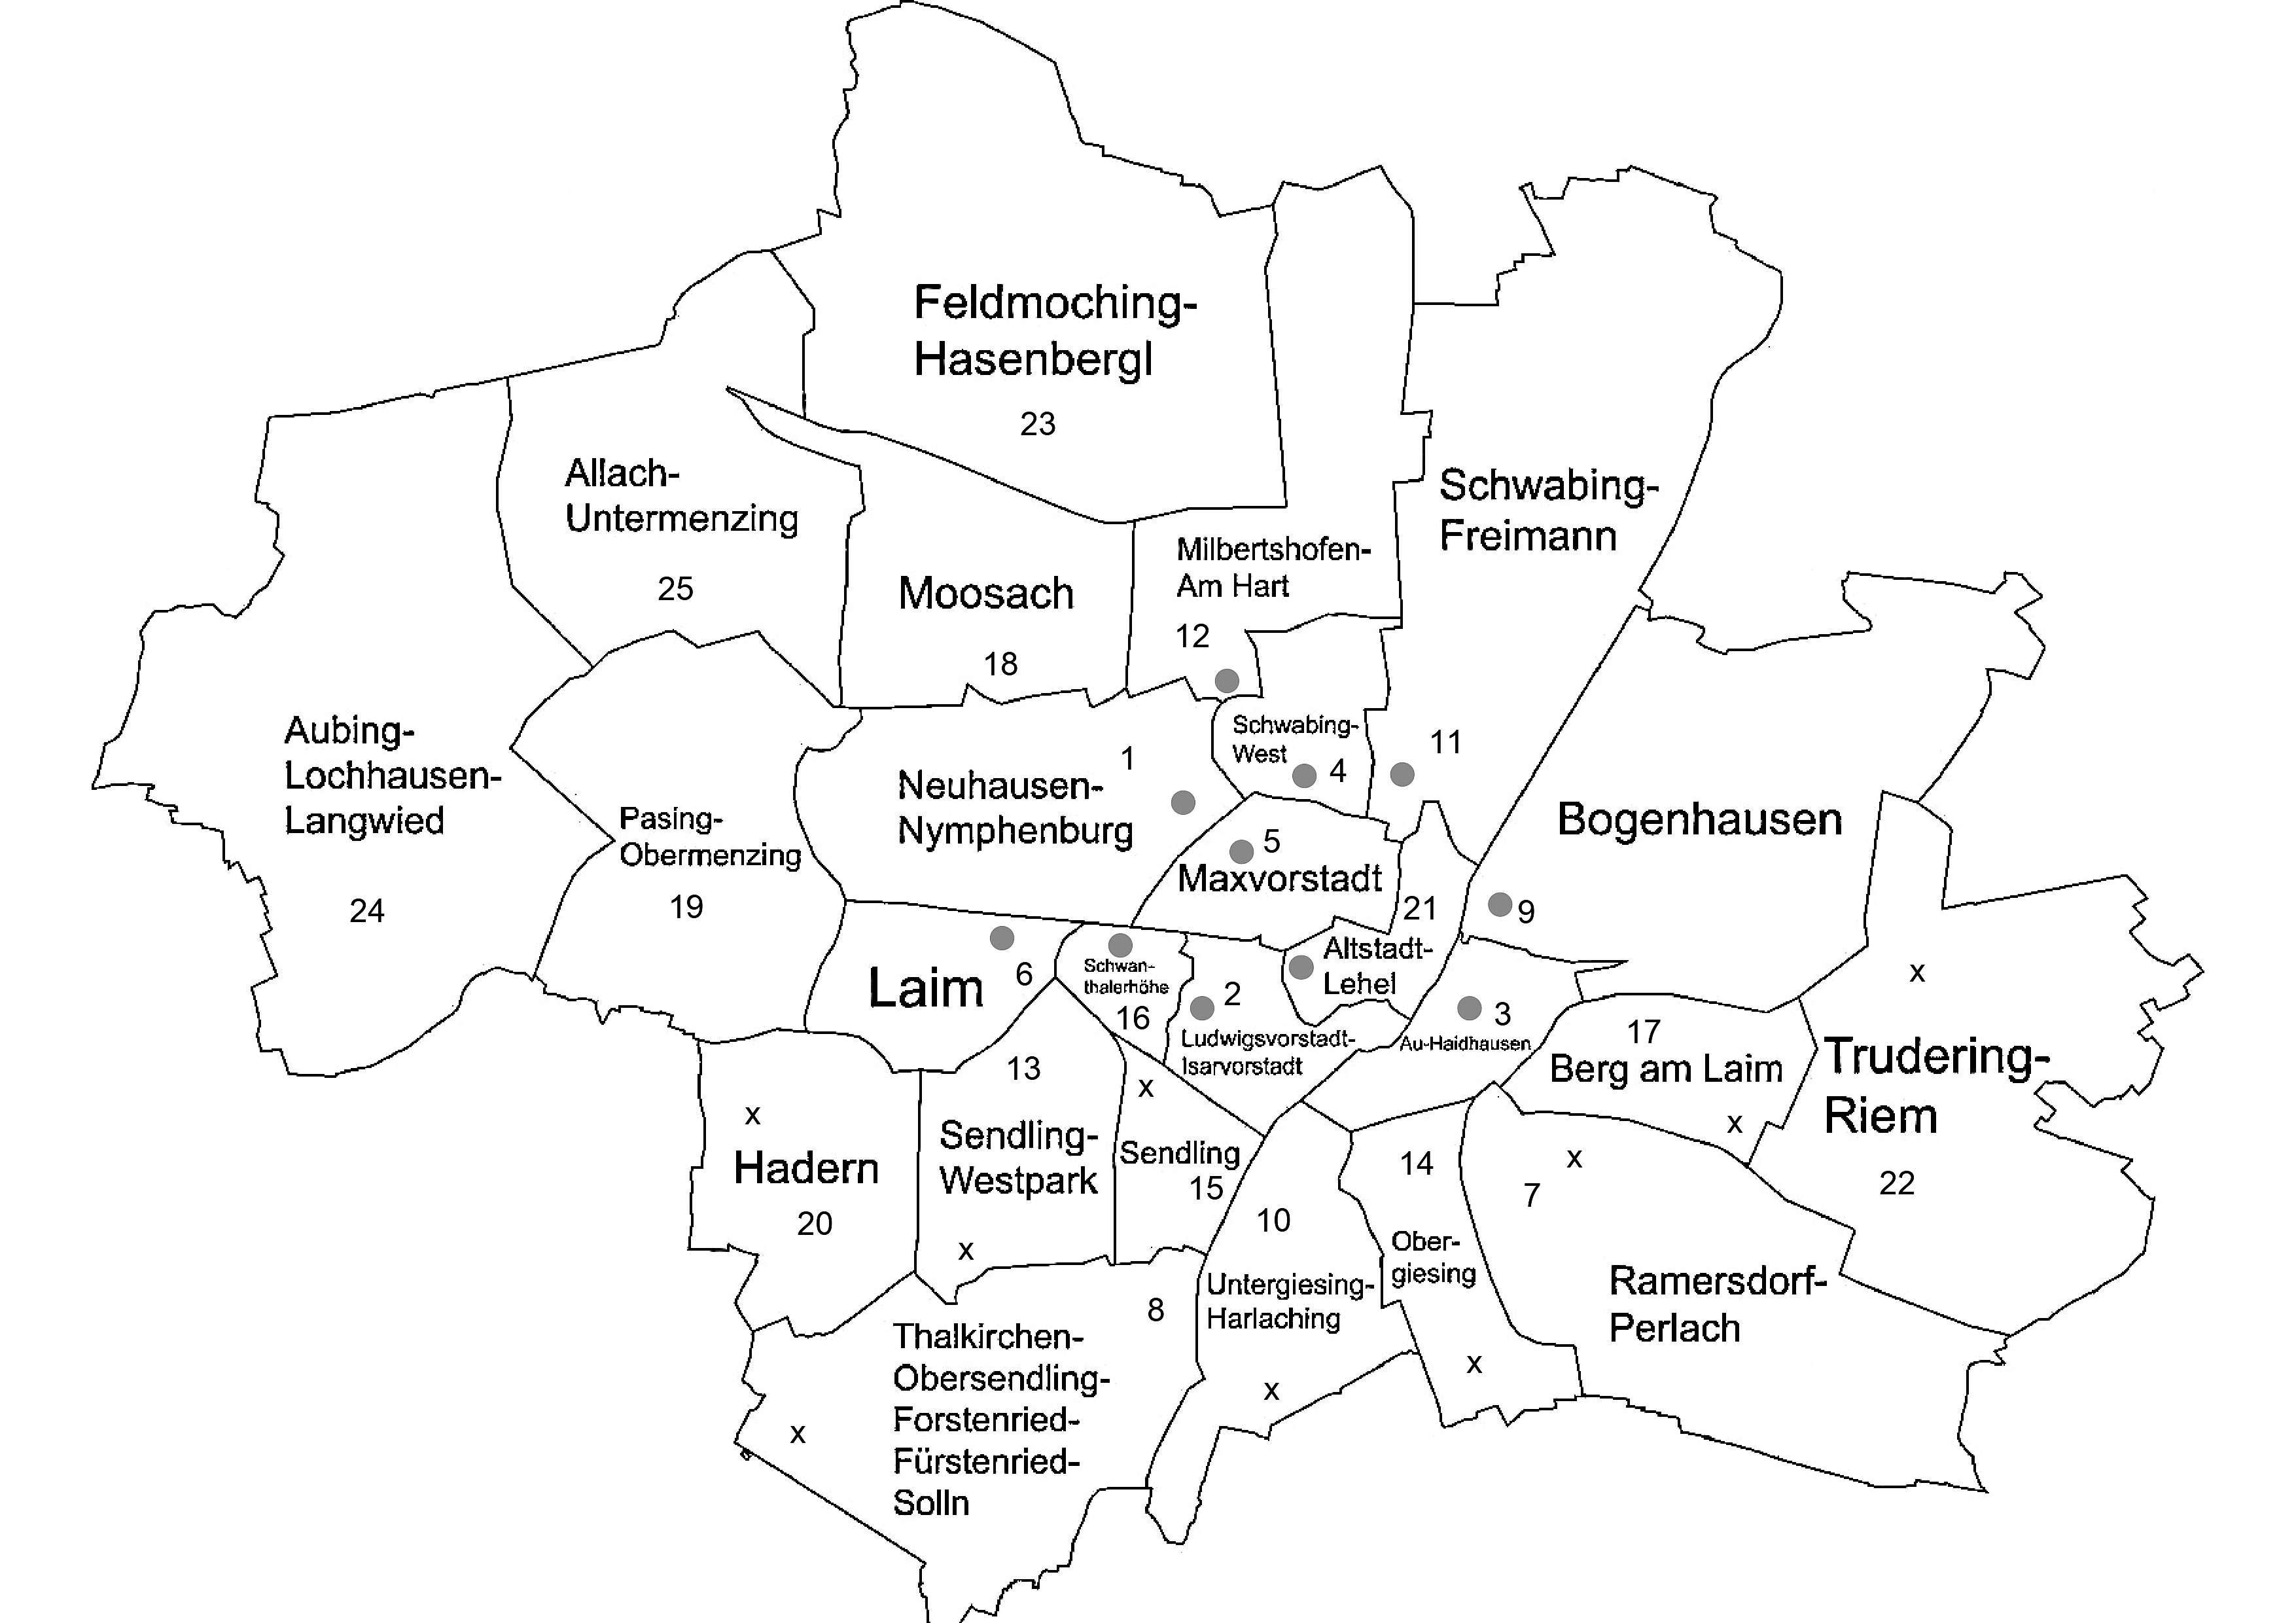

`Area 1`:

In [11]:
area1_index <- c(1, 2, 3, 4, 5, 6, 9 ,11, 12, 16, 21)
district_ordered[area1_index]

[1] "Neuh-Nymp"   "Lud-Isar"    "Au-Haid"     "SchwWest"    "Maxvor"     
 [6] "Laim"        "Bogenh"      "Schwab-Frei" "Mil-AmH"     "Schwanth"   
[11] "Alt-Le"

`Area 2`:

In [12]:
area2_index <- c(7, 8, 10, 13, 14, 15, 17, 20, 22)
district_ordered[area2_index]

[1] "Ram-Per"        "Th-Ob-Fo-Fu-So" "Ugies-Har"      "Send-West"     
[5] "Obgies"         "Send"           "BamLaim"        "Had"           
[9] "Trud-Rie"

`Area 3`:

In [13]:
area3_index <- setdiff(1:length(district_ordered), c(area1_index, area2_index))
district_ordered[area3_index]

[1] "Moos"       "Pas-Obmenz" "Feld-Has"   "Au-Lo-La"   "All-Umenz"

In [14]:
district_group_info <- data.frame(district = district_ordered,
                                  group = NA)
district_group_info$group[area1_index] <- "Area1"
district_group_info$group[area2_index] <- "Area2"
district_group_info$group[area3_index] <- "Area3"
data$district_group <- 
  district_group_info$group[match(data$district, district_group_info$district)]
data$district_group <- as.factor(data$district_group)
sum(table(data$district_group)) == nrow(data)

[1] TRUE

## discretize `rent` and `area`

Now, only two continuous variables remain:  `rent` and  `area`. To model the data under the Multinomial distribution, I applied a discretization method to convert these variables into discrete ones, aiming to preserve as much information as possible. Specifically, the discretization technique used is called information-preserving discretization, also known as the `Hartemink` method. The details of this transformation are presented in the code file. For the sake of brevity, the method itself will not be discussed in this project. 

In [15]:
data_bn <- data[, !(names(data) %in% c("yearc", "district"))]
data_bn$rent <- as.numeric(data_bn$rent)
data_bn$area <- as.numeric(data_bn$area)

In [16]:
data_disc <- discretize(data_bn, method = "hartemink",breaks = 3,ibreaks = 60,
                        idisc = "quantile")

New `rent` and `area`, each have 3 levels. For `rent`, these can be viewed as three pricing segments from low to high. As for `area` (apartment size), the levels represent small, medium, and large-sized units, respectively."

In [17]:
table(data_disc$rent)
table(data_disc$area)


  [77.31,406.132] (406.132,687.072] (687.072,1789.55] 
              582               923               548 


 [17,44]  (44,78] (78,185] 
     307     1086      660 

## New dataset for next step
The dataset after applying all the transformations described above is named `data_disc`, and its structure is as follows:

In [18]:
str(data_disc)

'data.frame':	2053 obs. of  11 variables:
 $ rent          : Factor w/ 3 levels "[77.31,406.132]",..: 3 3 2 2 3 3 1 2 2 1 ...
 $ area          : Factor w/ 3 levels "[17,44]","(44,78]",..: 2 2 2 2 3 3 2 3 2 2 ...
 $ rooms         : Factor w/ 6 levels "1","2","3","4",..: 2 2 3 3 4 4 2 3 1 3 ...
 $ bathextra     : Factor w/ 2 levels "no","yes": 1 1 1 2 2 1 2 1 1 1 ...
 $ bathtile      : Factor w/ 2 levels "no","yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ cheating      : Factor w/ 2 levels "no","yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ location      : Factor w/ 3 levels "good","normal",..: 1 1 1 2 1 2 2 2 2 2 ...
 $ upkitchen     : Factor w/ 2 levels "no","yes": 1 1 1 1 2 1 1 1 1 1 ...
 $ wwater        : Factor w/ 2 levels "no","yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ year_group    : Factor w/ 4 levels "1918-1959","1960-1969",..: 1 4 1 3 4 3 1 1 1 1 ...
 $ district_group: Factor w/ 3 levels "Area1","Area2",..: 1 1 1 2 2 2 2 2 2 2 ...


# Model Learning

Understanding the modeling process requires background knowledge in topics related to Directed Graphical Models (Bayesian Networks), such as learning methods, model learning algorithms, and more. A full discussion of these topics is beyond the scope of this report. For a deeper understanding of Directed Graphical Models, one may refer to the book: [Bayesian Networks With Examples in R](https://www.bnlearn.com/book-crc-2ed/).

Therefore, I will focus on interpreting the model to extract useful insights and demonstrating some of its applications, [skipping directly to the final model](#final-model).

In [19]:
set.seed(42)
suppressWarnings({
boot_pc <- boot.strength(data = data_disc, R = 500, algorithm = "pc.stable",
                         algorithm.args = list(test = "mi"))
boot_hc <- boot.strength(data = data_disc, R = 500, algorithm = "hc", 
                         algorithm.args = list(score = "bic"))
boot_mmhc <- boot.strength(data = data_disc, R = 500, algorithm = "mmhc")
})

In [20]:
avgnet_pc <- averaged.network(boot_pc[boot_pc$direction>=0.5,],threshold = 0.85)
avgnet_hc <- averaged.network(boot_hc[boot_hc$direction>=0.5,],threshold = 0.85)
avgnet_mmhc <- averaged.network(boot_mmhc[boot_mmhc$direction>=0.5,],threshold = 0.55)

In [21]:
mean_strength <- function(strength, DAG) 
  {arcs_net <- arcs(DAG)
  matched_strength <- strength[
    apply(strength[, c("from", "to")], 1, function(x)
      any(apply(arcs_net, 1, function(y) all(x == y)))
    ),]
  mean(matched_strength$strength)
  }
results <- data.frame(
  Algorithm = c("pc.stable", "hc", "mmhc"),
  BIC = c(score(avgnet_pc,   data = data_disc, type = "bic"),
          score(avgnet_hc,   data = data_disc, type = "bic"),
          score(avgnet_mmhc, data = data_disc, type = "bic")),  
  Egdes=c(dim(arcs(avgnet_pc))[1],
          dim(arcs(avgnet_hc))[1],
          dim(arcs(avgnet_mmhc))[1]),
  Mean_Strength = c(mean_strength(boot_pc,   avgnet_pc),
                    mean_strength(boot_hc,   avgnet_hc),
                    mean_strength(boot_mmhc, avgnet_mmhc))
  )
results

Algorithm,BIC,Egdes,Mean_Strength
<chr>,<dbl>,<int>,<dbl>
pc.stable,-14943.23,4,0.9970000
hc,-14191.93,9,0.9815556
mmhc,-14290.91,7,0.9734286


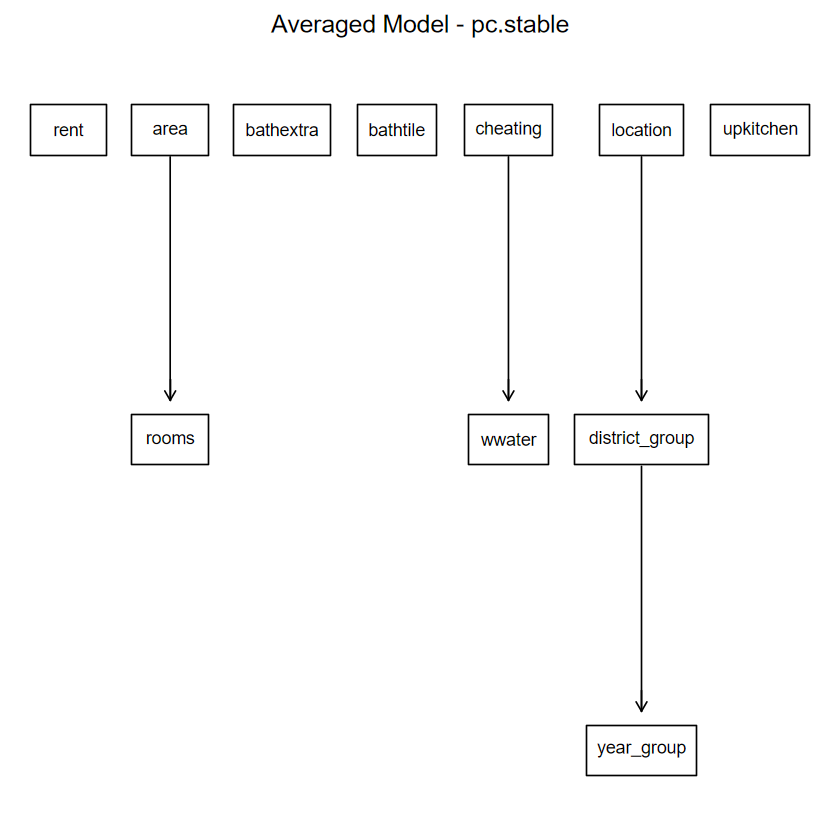

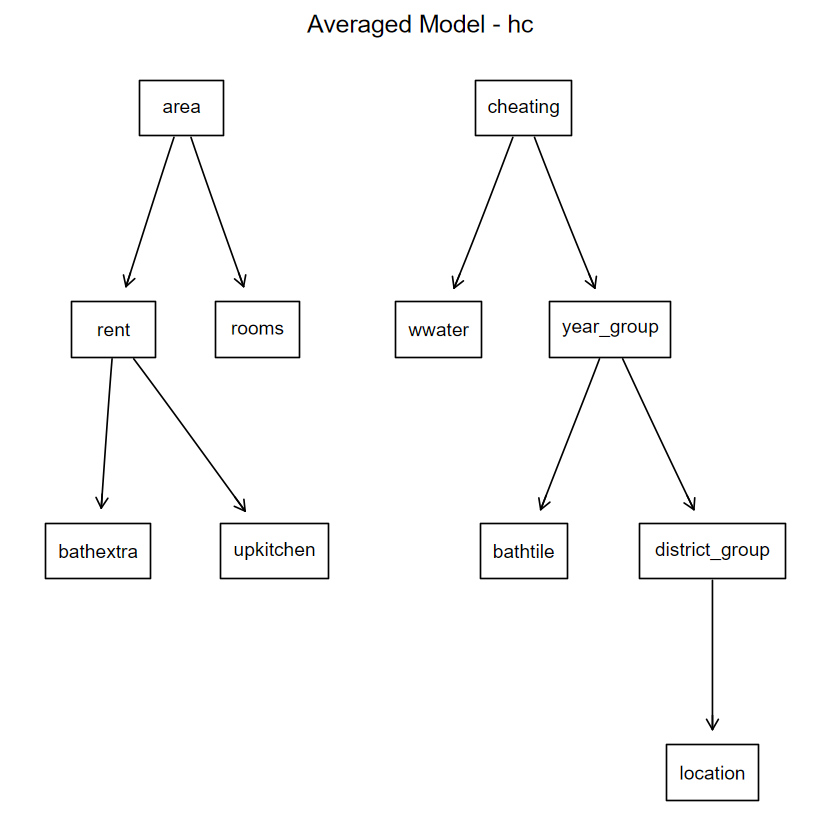

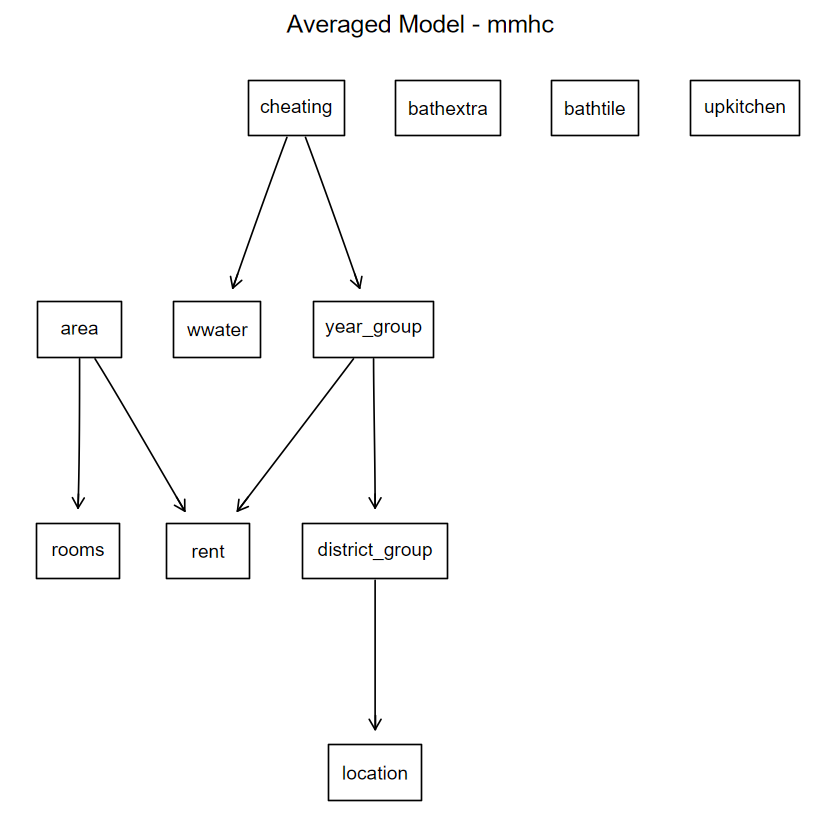

In [22]:
graphviz.plot(avgnet_pc, main = "Averaged Model - pc.stable")
graphviz.plot(avgnet_hc, main = "Averaged Model - hc")
graphviz.plot(avgnet_mmhc, main = "Averaged Model - mmhc")

In [23]:
avgnet_pc <- averaged.network(boot_pc[boot_pc$direction>=0.5,], threshold = 0.75)
avgnet_hc <- averaged.network(boot_hc[boot_hc$direction>=0.5,],threshold = 0.75)
avgnet_mmhc <- averaged.network(boot_mmhc[boot_mmhc$direction>=0.5,], threshold = 0.75)

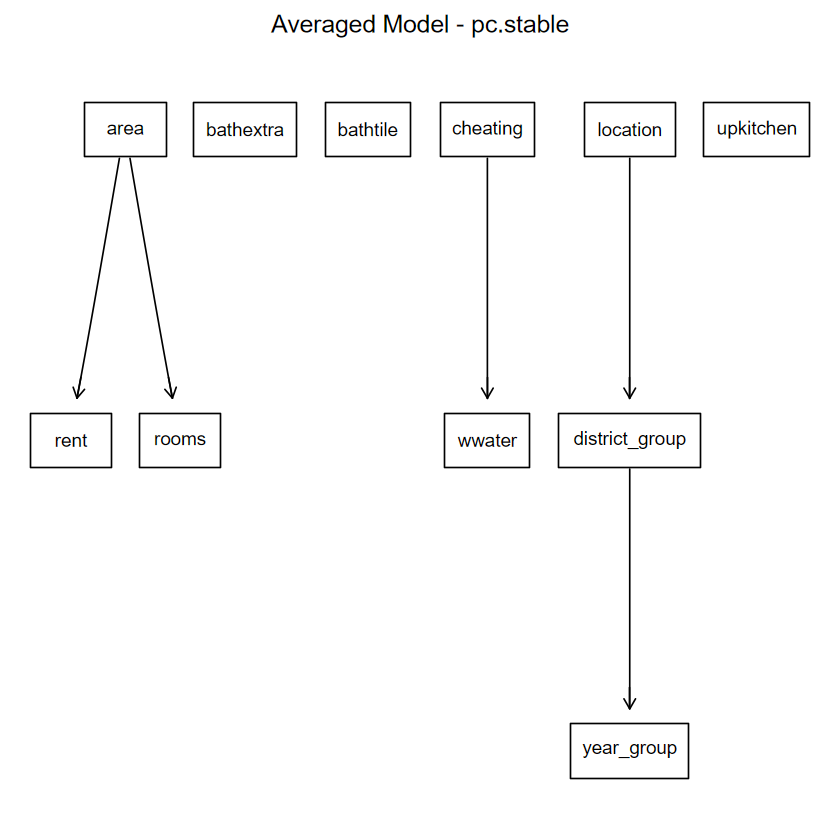

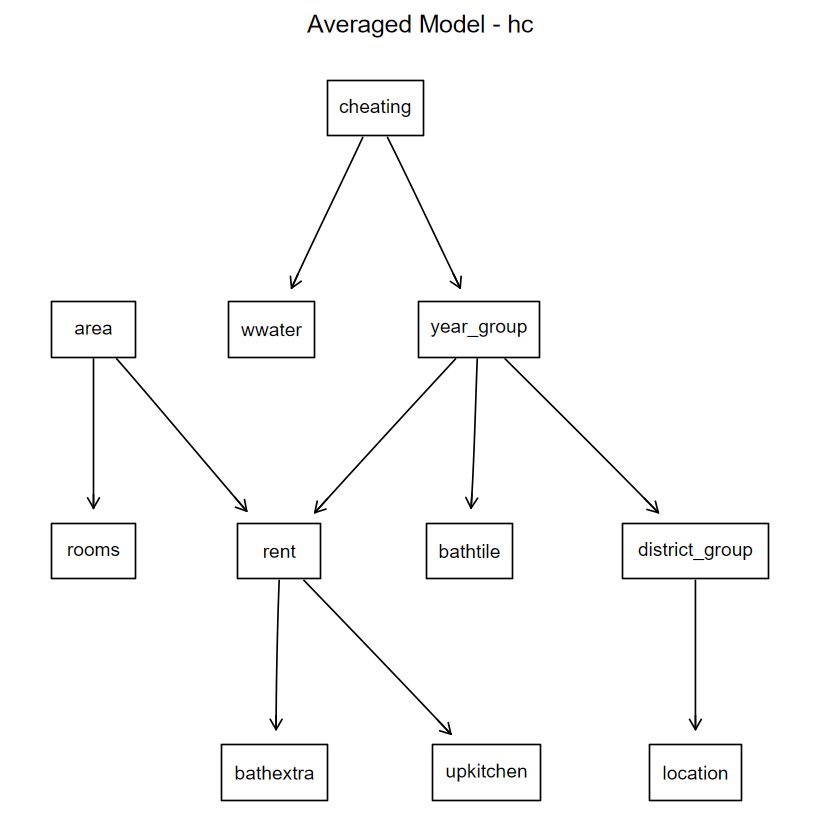

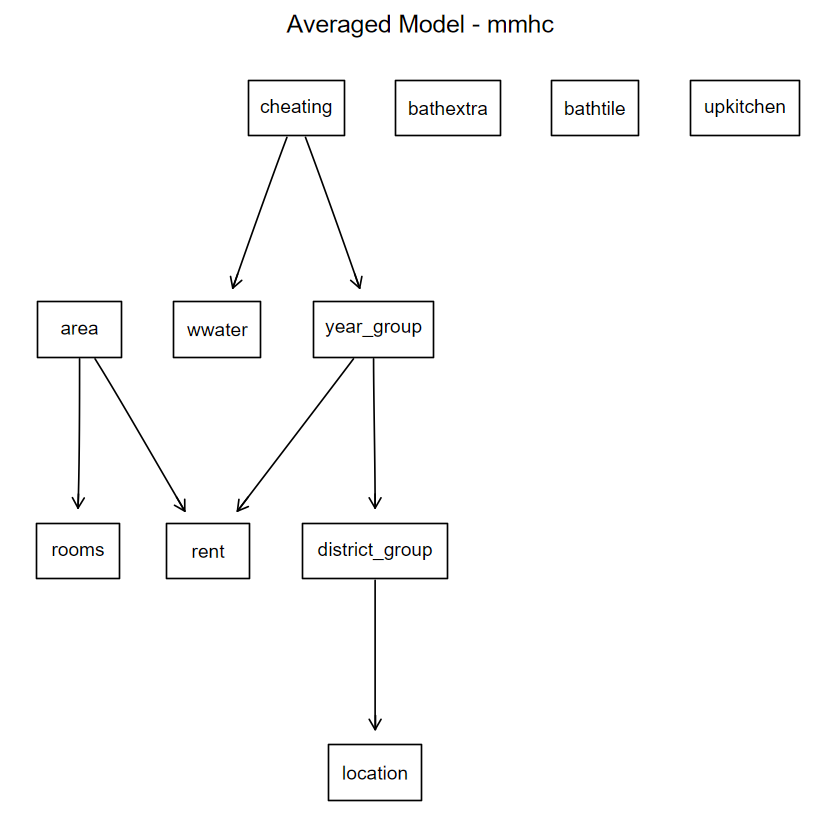

In [24]:
graphviz.plot(avgnet_pc, main = "Averaged Model - pc.stable")
graphviz.plot(avgnet_hc, main = "Averaged Model - hc")
graphviz.plot(avgnet_mmhc, main = "Averaged Model - mmhc")

In [25]:
results <- data.frame(
  Algorithm = c("pc.stable", "hc", "mmhc"),
  BIC = c(score(avgnet_pc,   data = data_disc, type = "bic"),
          score(avgnet_hc,   data = data_disc, type = "bic"),
          score(avgnet_mmhc, data = data_disc, type = "bic")),  
  Egdes=c(dim(arcs(avgnet_pc))[1],
          dim(arcs(avgnet_hc))[1],
          dim(arcs(avgnet_mmhc))[1]),
  Mean_Strength = c(mean_strength(boot_pc,   avgnet_pc),
                    mean_strength(boot_hc,   avgnet_hc),
                    mean_strength(boot_mmhc, avgnet_mmhc))
  )
results

Algorithm,BIC,Egdes,Mean_Strength
<chr>,<dbl>,<int>,<dbl>
pc.stable,-14450.33,5,0.9664000
hc,-14149.04,10,0.9624000
mmhc,-14290.91,7,0.9734286


# Final Model

## Fitting the Final Model

In [26]:
final_mod_dag=averaged.network(boot_hc[boot_hc$direction>=0.5,],threshold = 0.75)
fit = bn.fit(final_mod_dag, data = data_disc, method = "mle")

Check if any conditional probability can not be estimated

In [27]:
has_na <- sapply(fit, function(node) any(is.na(unlist(node$prob))))
table(has_na) # no NA, so the conditional probabilities are estimated without any problem

has_na
FALSE 
   11 

## Graphical Presentation

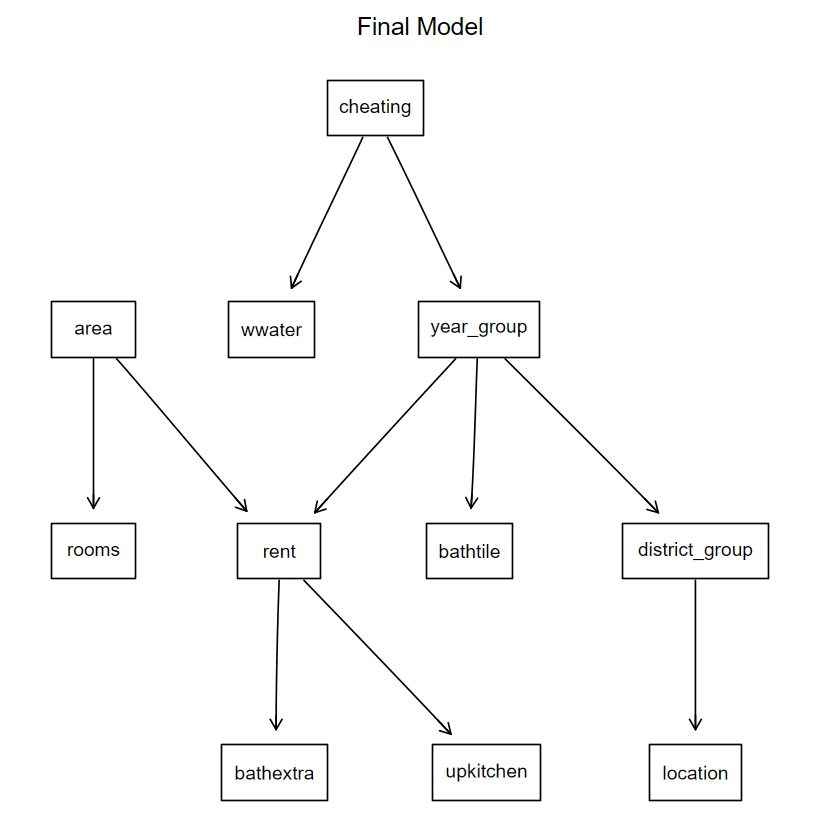

In [28]:
graphviz.plot(fit, main = "Final Model")

## Probabilistic Representation

See a few conditional probability tables for selected variables

In [29]:
fit$rooms
fit$location


  Parameters of node rooms (multinomial distribution)

Conditional probability table:
 
     area
rooms     [17,44]     (44,78]    (78,185]
    1 0.736156352 0.025782689 0.001515152
    2 0.263843648 0.565377532 0.030303030
    3 0.000000000 0.390423573 0.507575758
    4 0.000000000 0.018416206 0.368181818
    5 0.000000000 0.000000000 0.071212121
    6 0.000000000 0.000000000 0.021212121


  Parameters of node location (multinomial distribution)

Conditional probability table:
 
        district_group
location       Area1       Area2       Area3
  good   0.514827018 0.224924012 0.165745856
  normal 0.464579901 0.746200608 0.828729282
  top    0.020593081 0.028875380 0.005524862

# Use the Model to get insights

## Model Interpretation 

From the [Probabilistic Presentation](#Probabilistic-Representation), `rent` is directly related to the property's area (`area`), year of construction (  `year_group`), and the presence of high-quality bathroom and upscale kitchen equipment (  `bathextra` and `upkitchen`). The remaining factors are indirectly related to the `rent` through these direct factors. 

Once the direct factors are known, the indirect ones become conditionally independent of `rent`, i.e., they no longer affect its probability. This is evident in the querying and prediction steps below.

## Querying

In [30]:
gr_fit <- as.grain(fit)

By simply formulating the question as a conditional probability with the relevant conditions, the model can provide an answer

In [31]:
names(data)

[1] "rent"           "area"           "rooms"          "yearc"         
 [5] "bathextra"      "bathtile"       "cheating"       "district"      
 [9] "location"       "upkitchen"      "wwater"         "year_group"    
[13] "district_group"

1.Probability of houses having certain amenities such as: cheating, wwater, bathtile, bathextra and upkitchen. This means computing the following conditional probabilities: 
$$\mathbb{P} \left(\text{X=yes}\right), \quad \text{X} \in  \{\text{cheating, wwater, bathtile,bathextra, upkitchen}\}$$
  

In [32]:
querygrain(gr_fit, nodes = c("cheating"),type = "joint")["yes"]*100
querygrain(gr_fit, nodes = c("wwater"),type = "joint")["yes"]*100
querygrain(gr_fit, nodes = c("bathtile"),type = "joint")["yes"]*100
querygrain(gr_fit, nodes = c("bathextra"),type = "joint")["yes"]*100
querygrain(gr_fit, nodes = c("upkitchen"),type = "joint")["yes"]*100

yes 
91.47589

yes 
96.49294

yes 
81.4905

yes 
9.320314

yes 
7.330847

Note that the results above are consistent with the findings from the EDA step.

2.If a house is equipped with premium amenities, what price segment is it most likely to belong to?
$$
\mathbb{P}(\text{rent }|\text{ bathextra = yes, upkitchen = yes})
$$

In [33]:
print(querygrain(
    setEvidence(gr_fit,nodes = c("bathextra","upkitchen"),states = c("yes","yes")), 
    nodes = c("rent"),type = "joint"))

rent
  [77.31,406.132] (406.132,687.072] (687.072,1789.55] 
      0.005196084       0.145140953       0.849662962 


The two queries above have helped answer some questions posed in the introduction of the project. If there are other questions, just simply perform model queries in a similar manner.

## Predicting

The model can also assist in making some predictions about `rent`.

In [34]:
levels(data_disc$year_group)
table(data_disc$year_group)

[1] "1918-1959" "1960-1969" "1970-1989" "1990-2001"


1918-1959 1960-1969 1970-1989 1990-2001 
      890       473       471       219 

What is the rent like for houses built between 1918 and 1959 with a top location?

In [35]:
print(querygrain(
    setEvidence(gr_fit,nodes = c("year_group","location"),states = c("1970-1989","top")), 
    nodes = c("rent"),type = "joint"))

rent
  [77.31,406.132] (406.132,687.072] (687.072,1789.55] 
        0.1842654         0.5513035         0.2644311 


The most common rental price for houses with those characteristics falls within the medium price segment, accounting for approximately 55.1%

However, with the `location` being "good", the result remains unchanged.

In [36]:
print(querygrain(
    setEvidence(gr_fit,nodes = c("year_group","location"),states = c("1970-1989","good")), 
    nodes = c("rent"),type = "joint"))

rent
  [77.31,406.132] (406.132,687.072] (687.072,1789.55] 
        0.1842654         0.5513035         0.2644311 


As previously explained in the interpretation section, since year_group has a direct influence on rent, once its value is fixed, location—which is only indirectly related to rent through year_group—will no longer affect rent. This leads to the rental price distribution remaining unchanged, regardless of whether the location is "good" or "top".

In [37]:
levels(data_disc$area)
levels(data_disc$rooms)

[1] "[17,44]"  "(44,78]"  "(78,185]"

[1] "1" "2" "3" "4" "5" "6"

What is the expected rental price for a house with an area between 78 and 185 square meters and 3 to 5 bedrooms?

In [38]:
print(querygrain(
    setEvidence(gr_fit,nodes = c("area","rooms"),states = c('(78,185]',"1")), 
    nodes = c("rent"),type = "joint"))
print(querygrain(
    setEvidence(gr_fit,nodes = c("area","rooms"),states = c('(78,185]',"3")), 
    nodes = c("rent"),type = "joint"))
print(querygrain(
    setEvidence(gr_fit,nodes = c("area","rooms"),states = c('(78,185]',"6")), 
    nodes = c("rent"),type = "joint"))

rent
  [77.31,406.132] (406.132,687.072] (687.072,1789.55] 
       0.05303128        0.32989380        0.61707492 
rent
  [77.31,406.132] (406.132,687.072] (687.072,1789.55] 
       0.05303128        0.32989380        0.61707492 
rent
  [77.31,406.132] (406.132,687.072] (687.072,1789.55] 
       0.05303128        0.32989380        0.61707492 


A house with an area in the range of (78,185] falls into the same rental price segments regardless of the number of bedrooms. The reason is similar to the previous example.

To make predictions under different conditions, simply follow the same procedure as above.